<a href="https://colab.research.google.com/github/dlcodnjs2/2023/blob/main/Pima_indian_%EB%8B%B9%EB%87%A8%EB%B3%91_%EB%AC%B8%EC%A0%9C_Logistic_regression_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

targetUrl = "https://raw.githubusercontent.com/dlcodnjs2/2023/main/diabetes.csv"

df = pd.read_csv(targetUrl, sep=',')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
from sklearn.model_selection import train_test_split

X_data = df.drop(['Outcome'],axis=1)
y_target = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_target, test_size=0.3, random_state=156)

In [5]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train.iloc[:,0:])
X_train.iloc[:,0:]= std.transform(X_train.iloc[:,0:])

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
58,-1.174241,0.794473,0.658358,-1.286489,-0.693577,1.092292,4.207158,0.899501
420,-0.876944,-0.044497,0.971779,1.364140,0.861465,1.703294,0.161475,-0.623992
664,0.609543,-0.168789,-0.490850,1.234841,-0.693577,0.226708,-0.670525,0.560947
515,-0.282349,1.322713,0.031517,-0.122798,0.266890,-0.040605,-0.597487,-0.454715
178,0.312245,0.701254,0.449411,-1.286489,-0.693577,1.665106,-0.845182,1.153416


In [6]:
X_test.iloc[:,0:] = std.transform(X_test.iloc[:,0:])
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
306,1.798732,1.260567,-0.072956,0.200450,0.513867,-0.817086,-0.413304,1.153416
628,0.312245,0.235159,0.553885,-1.286489,-0.693577,0.341270,-0.991258,0.984139
333,2.393327,-0.448446,0.553885,-1.286489,-0.693577,-1.058941,-1.013487,0.899501
388,0.312245,0.732327,0.658358,0.394398,1.913404,0.010311,-0.013181,2.084440
97,-0.876944,-1.536000,-1.117692,-0.122798,0.001618,-1.466275,-0.422830,-0.962546


In [7]:
df_cat_std = pd.concat([X_train,y_train], axis=1)

df_cat_std2 = pd.concat([X_test,y_test], axis=1)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.7272727272727273


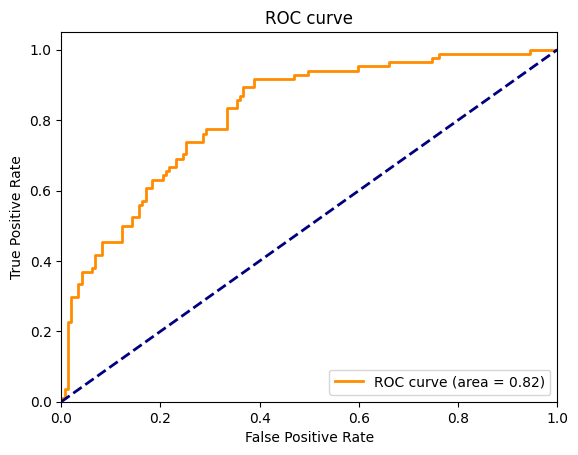

AUC: 0.8183511499838031


In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)